In [15]:
import os
import dlib
import cv2
import numpy as np

# Path to the images folder
images_folder = r".\\images"

# Initialize Dlib's face detector
detector = dlib.get_frontal_face_detector()

# Initialize Dlib's shape predictor with the 68 landmarks model
shape_predictor_path = r'.\\shape_predictor_68_face_landmarks.dat'
predictor = dlib.shape_predictor(shape_predictor_path)

# Create an empty list to store the landmarks
landmarks_list = []

# Loop through all the images in the "images" folder
for filename in os.listdir(images_folder):
    image_path = os.path.join(images_folder, filename)

    # Read the image
    image = cv2.imread(image_path)
    
    if image is None:
        print("The following image cannot be processed: ", image_path)
        continue  # Skip if the image cannot be read

    # Detect faces in the image
    faces = detector(image, 1)
    
    if len(faces) > 0:
        print("A face was found on the following image: ", image_path)
        # Assuming only one face per image, take the first detected face
        face = faces[0]

        # Predict the 68 landmarks for the face
        shape = predictor(image, face)

        # Extract the coordinates of the landmarks
        landmarks = np.array([[shape.part(i).x, shape.part(i).y] for i in range(68)])

        # Flatten the array and append to the landmarks list
        landmarks_list.append(landmarks.flatten())
        
           
        # Draw the landmarks on the image
        for point in range(68):
            x, y = shape.part(point).x, shape.part(point).y
            cv2.circle(image, (x, y), 2, (0, 255, 0), -1)  # Draw a small green circle
        """
        #Display the image with landmarks
        cv2.imshow('Facial Landmarks', image)
        cv2.waitKey(0)  # Press any key to close the window 
        cv2.destroyAllWindows()"""
        

    else: 
        print("A face was not found on the following image: ", image_path)


# Convert the landmarks list to a numpy array
land_X = np.array(landmarks_list)

# Print the shape of the resulting matrix
print(f"land_X shape: {land_X.shape}")

# output_folder = r'C:\Users\Jason\Desktop\President Face Coordinates'  # Change to your desired directory
# os.makedirs(output_folder, exist_ok=True)  # Create the folder if it doesn't exist
# output_path = os.path.join(output_folder, 'landmarks.npy')
# np.save(output_path, land_X)



A face was found on the following image:  .\\images\1_1.jpg
A face was found on the following image:  .\\images\1_2.jpg
A face was found on the following image:  .\\images\1_3.jpg
A face was found on the following image:  .\\images\1_4.jpg
A face was found on the following image:  .\\images\1_5.jpg
A face was found on the following image:  .\\images\1_6.jpg
A face was found on the following image:  .\\images\1_7.jpg
A face was found on the following image:  .\\images\1_8.jpg
A face was found on the following image:  .\\images\1_9.jpg
A face was found on the following image:  .\\images\2_1.jpg
A face was found on the following image:  .\\images\2_2.jpg
A face was found on the following image:  .\\images\2_3.jpg
A face was found on the following image:  .\\images\2_4.jpg
A face was found on the following image:  .\\images\2_5.jpg
A face was found on the following image:  .\\images\2_6.jpg
A face was found on the following image:  .\\images\2_7.jpg
A face was found on the following image:

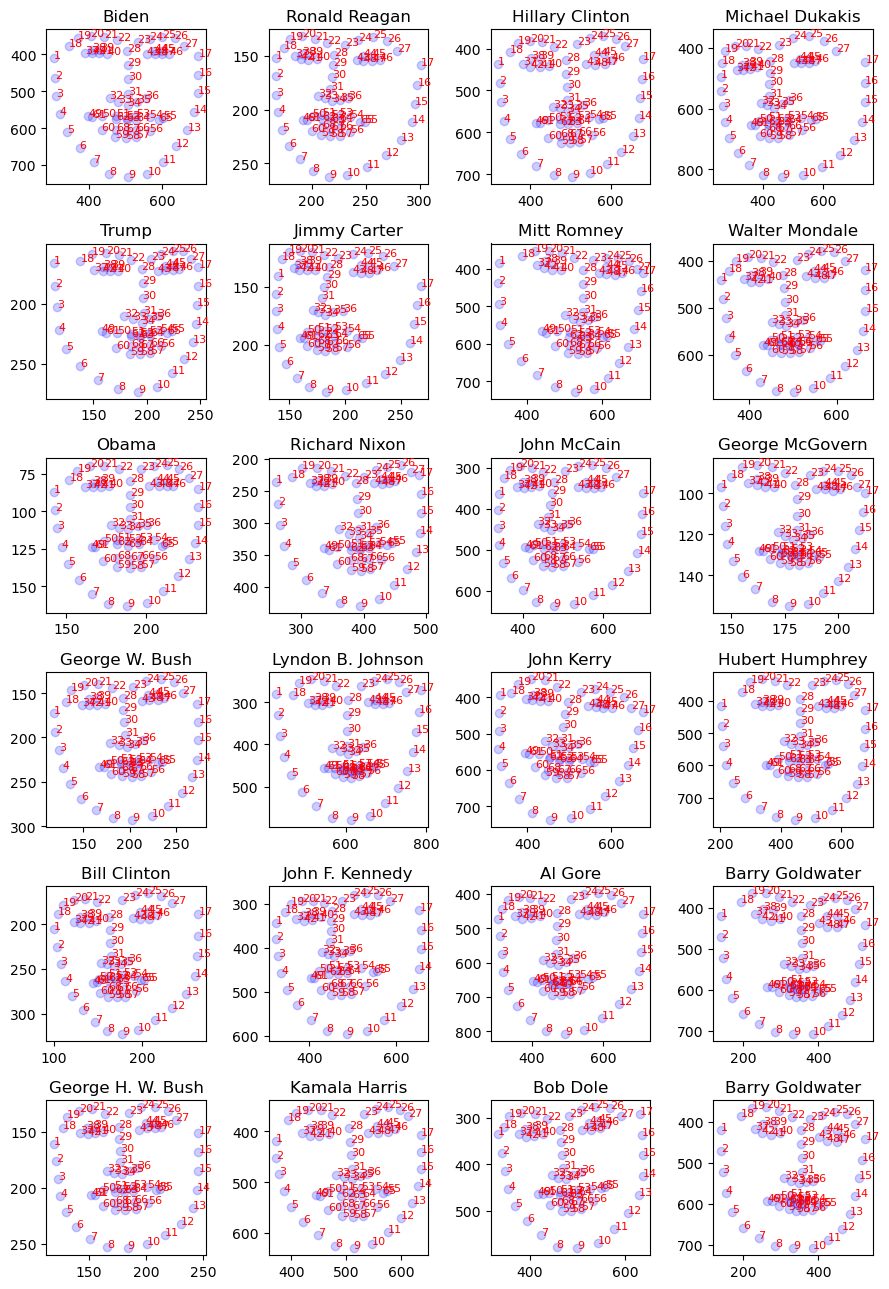

In [16]:
import matplotlib.pyplot as plt
import numpy as np
even_indx = np.arange(0,int(len(land_X[1,:])),2)
odd_indx = np.arange(1,int(len(land_X[1,:])),2)
# print(odd_indx,'\n',even_indx)
# print(len(land_X[11,:]))

# Scatter plot
# fig, ax = plt.subplots(4, 3, figsize=(9, 13))

b = 0
k = 0
p = 0

'''
 losers_list = ['Barry Goldwater','Hubert Humphrey','George McGovern'
                   ,'Walter Mondale','Michael Dukakis','Bob Dole',
                  'Al Gore','John Kerry','John McCain','Mitt Romney','Hillary Clinton','Kamala Harris']

winners_list = ['John F. Kennedy','Lyndon B. Johnson','Richard Nixon','Jimmy Carter','Ronald Reagan','George H. W. Bush',
                'Bill Clinton','George W. Bush','Barack Obama','Donald Trump','Joe Biden']
'''

President_list = ['Biden','Trump','Obama','George W. Bush','Bill Clinton','George H. W. Bush',
                    'Ronald Reagan','Jimmy Carter','Richard Nixon','Lyndon B. Johnson','John F. Kennedy',
                    'Kamala Harris','Hillary Clinton','Mitt Romney','John McCain','John Kerry',
                    'Al Gore','Bob Dole','Michael Dukakis','Walter Mondale','George McGovern'
                    ,'Hubert Humphrey','Barry Goldwater']


#while b < 3:

    # k=0

    # while k < 4:

    #     ax[k,b].scatter(land_X[p, even_indx],land_X[p, odd_indx],color='blue',alpha=0.2)

    #     # Add labels to each point
    #     for i, (x, y) in enumerate(zip(land_X[p, odd_indx], land_X[p, even_indx])):
    #         ax[k,b].text(y, x, str(i+1), fontsize=8, color='red')

    #     ax[k,b].invert_yaxis()
    #     ax[k,b].set_title(losers_list[p])

    #     k+=1
    #     p+=1
    # b+=1

fig1, ax = plt.subplots(6, 4, figsize=(9, 13))

while b < 4:

    k=0

    while k < 6:


        ax[k,b].scatter(land_X[p, even_indx],land_X[p, odd_indx],color='blue',alpha=0.2)

        # Add labels to each point
        for i, (x, y) in enumerate(zip(land_X[p, odd_indx], land_X[p, even_indx])):
            ax[k,b].text(y, x, str(i+1), fontsize=8, color='red')

        ax[k,b].invert_yaxis()
        ax[k,b].set_title(President_list[p])

        k+=1

        if p < 22:
            p+=1
    b+=1

plt.tight_layout()
plt.show()
   

In [ ]:
import numpy as np
import pandas as pd

# Create an empty DataFrame to hold the results
df = pd.DataFrame()
p=0

# Loop through each president (row in land_X)
for i, landmarks in enumerate(land_X):

    # Separate X (odd indices) and Y (even indices)
    x_coords = landmarks[odd_indx]
    y_coords = landmarks[even_indx]

    # Create a DataFrame for this president
    p_df = pd.DataFrame({
        'X_' + President_list[i]: x_coords,
        'Y_' + President_list[i]: y_coords
    })

    # Append to the main DataFrame
    df = pd.concat([df, p_df], axis=1)

    p+=1

# Display the resulting DataFrame
print(df)

# Optionally, save the DataFrame to a CSV file
df.to_csv(r'.\\landmarks_presidents.csv', index=False)


    X_Biden  Y_Biden  X_Trump  Y_Trump  X_Obama  Y_Obama  X_George W. Bush  \
0       411      304      166      113       87      142               173   
1       463      307      185      114       99      143               194   
2       513      311      203      116      111      144               214   
3       563      321      222      118      124      147               235   
4       612      341      238      125      135      151               253   
..      ...      ...      ...      ...      ...      ...               ...   
63      577      529      226      203      122      196               229   
64      577      591      224      219      123      210               229   
65      606      529      234      203      131      197               236   
66      608      503      236      194      132      190               238   
67      604      474      235      185      131      182               237   

    Y_George W. Bush  X_Bill Clinton  Y_Bill Clinton  ...  X_Mi

In [18]:
print(land_X[0,:])

[304 411 307 463 311 513 321 563 341 612 375 654 413 692 456 725 507 734
 560 725 603 691 638 649 669 605 688 556 697 505 699 455 699 405 345 376
 370 356 405 351 441 353 477 361 533 366 566 357 600 352 634 356 659 376
 504 392 506 430 507 467 507 507 457 518 480 528 506 537 532 528 555 519
 389 396 410 388 430 388 450 398 428 397 409 396 558 400 579 391 599 390
 620 399 599 399 580 399 398 567 437 566 475 567 503 572 529 568 566 569
 603 574 566 609 530 624 502 627 472 623 435 604 410 571 475 575 503 579
 529 577 591 577 529 606 503 608 474 604]


In [19]:
import numpy as np

# Assuming `land_X` is your NumPy array with landmarks
# Array to store distances for each president
distances = []

# Loop through each president (row in land_X)
for i, landmarks in enumerate(land_X):
    # Extract coordinates for point 1 (index 0) and point 17 (index 16)
    x1, y1 = landmarks[9], landmarks[8]  # Odd index is X, Even index is Y
    x17, y17 = landmarks[47], landmarks[46]  # Odd index is X, Even index is Y

    # Calculate Euclidean distance
    distance = np.sqrt((x17 - x1)**2 + (y17 - y1)**2)
    distances.append(distance)

# Convert distances to a NumPy array
distances = np.array(distances)

# Print the resulting distances
print("Distances between point 1 and point 17 for each president:")
print(distances)

len(distances)


Distances between point 1 and point 17 for each president:
[340.07352146 118.25819211  84.50443775 142.87407043 133.45411196
 114.85643212 109.34349546 103.7111373  198.97989848 304.2663307
 263.88254963 246.91091511 312.40998704 347.79447954 301.8907087
 307.68977884 352.23003847 248.50955716 392.22952464 275.04545079
  60.8276253  434.31094852 338.        ]


23

In [20]:
import pandas as pd
import numpy as np

# Assuming `df` is your DataFrame and `distances` is the array of distances
# Make a copy of the DataFrame to avoid modifying the original
df_normalized = df.copy()

# List of president names (e.g., from the column headers in `df`)
presidents = [col.split('_')[1] for col in df.columns if col.startswith('X')]

# Loop through each president and normalize their coordinates
for i, president in enumerate(presidents):
    # Get the distance for the current president
    distance = distances[i]

    # Normalize X and Y columns for this president
    df_normalized[f'X_{president}'] /= distance
    df_normalized[f'Y_{president}'] /= distance

# Display the normalized DataFrame
print(df_normalized)

# Optionally, save the normalized DataFrame to a CSV file
df_normalized.to_csv(r'.\\normalized_landmarks_presidents.csv', index=False)


     X_Biden   Y_Biden   X_Trump   Y_Trump   X_Obama   Y_Obama  \
0   1.208562  0.893924  1.403708  0.955536  1.029532  1.680385   
1   1.361470  0.902746  1.564374  0.963992  1.171536  1.692219   
2   1.508497  0.914508  1.716583  0.980905  1.313540  1.704053   
3   1.655524  0.943914  1.877248  0.997817  1.467379  1.739554   
4   1.799611  1.002724  2.012546  1.057009  1.597549  1.786888   
..       ...       ...       ...       ...       ...       ...   
63  1.696692  1.555546  1.911073  1.716583  1.443711  2.319405   
64  1.696692  1.737860  1.894161  1.851880  1.455545  2.485077   
65  1.781968  1.555546  1.978721  1.716583  1.550214  2.331239   
66  1.787849  1.479092  1.995633  1.640478  1.562048  2.248403   
67  1.776087  1.393816  1.987177  1.564374  1.550214  2.153733   

    X_George W. Bush  Y_George W. Bush  X_Bill Clinton  Y_Bill Clinton  ...  \
0           1.210857          0.825902        1.536109        0.749321  ...   
1           1.357839          0.839900        1.6

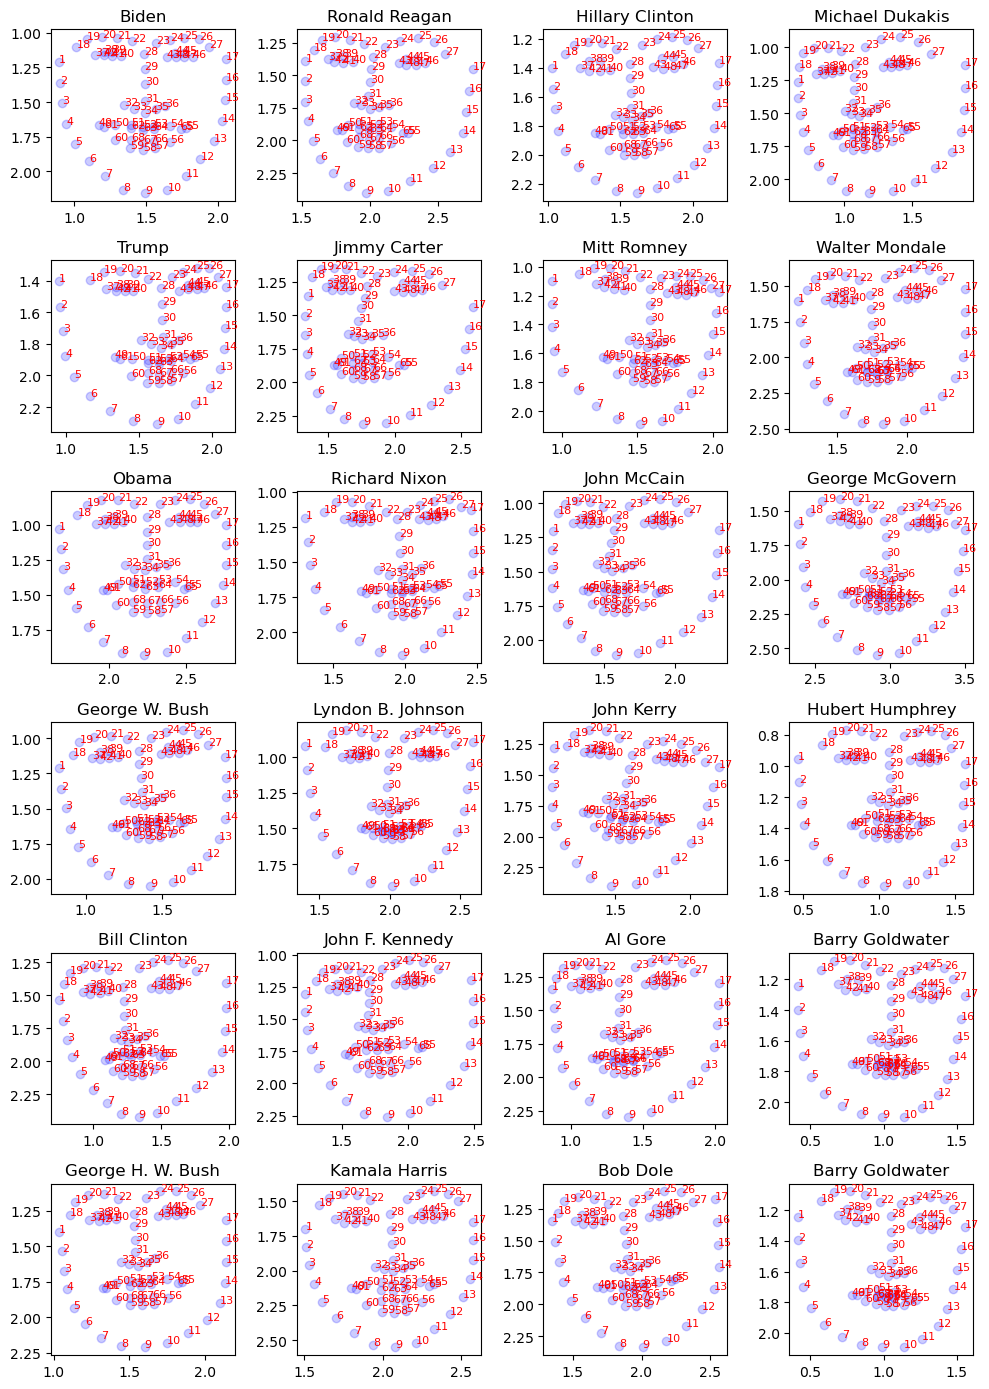

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize variables
fig1, ax = plt.subplots(6, 4, figsize=(10, 14))  # Create a 6x4 grid of subplots
b = 0  # Column index
p = 0  # President index

# List of president names based on normalized DataFrame columns
presidents = [col.split('_')[1] for col in df_normalized.columns if col.startswith('X')]

# Loop through columns to plot
while b < 4:  # Loop over subplot columns
    k = 0  # Row index

    while k < 6:  # Loop over subplot rows
        if p >= len(presidents):  # Stop if all presidents are plotted
            break

        # Extract normalized X and Y values for the current president
        x_coords = df_normalized[f'X_{presidents[p]}']
        y_coords = df_normalized[f'Y_{presidents[p]}']

        # Scatter plot
        ax[k, b].scatter(y_coords, x_coords, color='blue', alpha=0.2)

        # Add labels to each point
        for i, (x, y) in enumerate(zip(x_coords, y_coords)):
            ax[k, b].text(y, x, str(i + 1), fontsize=8, color='red')

        # Customize the subplot
        ax[k, b].invert_yaxis()  # Invert the y-axis
        ax[k, b].set_title(presidents[p])  # Title with president's name

        k += 1  # Move to the next row
        if p < len(presidents) - 1:
            p += 1  # Move to the next president

    b += 1  # Move to the next column

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [22]:
df.head()

,X_Biden,Y_Biden,X_Trump,Y_Trump,X_Obama,Y_Obama,X_George W. Bush,Y_George W. Bush,X_Bill Clinton,Y_Bill Clinton,...,X_Michael Dukakis,Y_Michael Dukakis,X_Walter Mondale,Y_Walter Mondale,X_George McGovern,Y_George McGovern,X_Hubert Humphrey,Y_Hubert Humphrey,X_Barry Goldwater,Y_Barry Goldwater
0,411,304,166,113,87,142,173,118,205,100,...,496,259,441,334,97,145,416,201,420,140
1,463,307,185,114,99,143,194,120,226,104,...,543,260,482,339,106,146,479,205,472,141
2,513,311,203,116,111,144,214,124,245,108,...,592,266,523,346,116,147,539,209,523,145
3,563,321,222,118,124,147,235,128,263,113,...,644,274,564,353,125,148,600,218,574,153
4,612,341,238,125,135,151,253,136,280,121,...,697,288,602,366,133,151,654,243,620,171


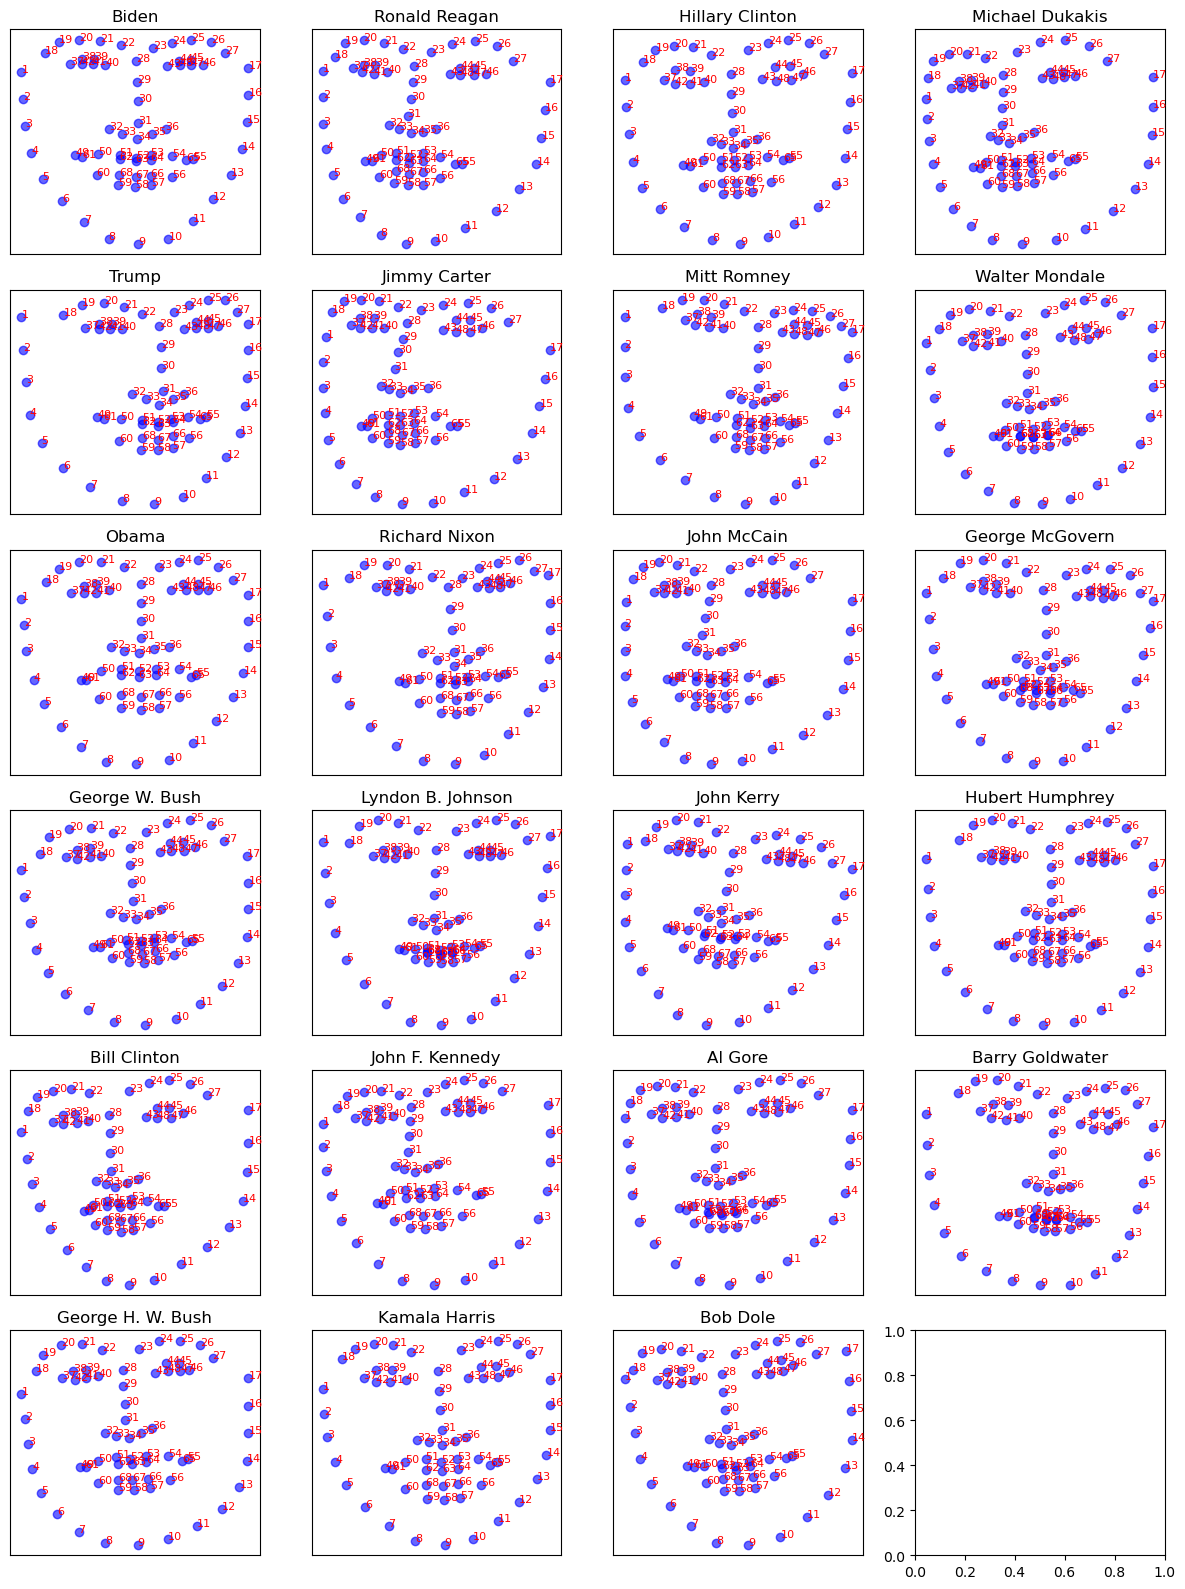

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `land_X` is already defined as a NumPy array and `df` is a DataFrame created from it
# Create a list to store distances for each president
distances = []

# List of president names based on DataFrame columns
presidents = [col.split('_')[1] for col in df.columns if col.startswith('X')]

# Loop through each president
for i, president in enumerate(presidents):
    # Extract coordinates for point 1 (index 0) and point 17 (index 16)
    x1, y1 = df.loc[8, f'X_{president}'], df.loc[8, f'Y_{president}']
    x17, y17 = df.loc[22, f'X_{president}'], df.loc[22, f'Y_{president}']

    # Calculate Euclidean distance
    distance = np.sqrt((x17 - x1) ** 2 + (y17 - y1) ** 2)
    distances.append(distance)

# Add distances to the DataFrame for better tracking
df_distances = pd.DataFrame({'President': presidents})

# Normalize coordinates in the DataFrame using distances
df_normalized = df.copy()
for i, president in enumerate(presidents):
    df_normalized[f'X_{president}'] /= distances[i]
    df_normalized[f'Y_{president}'] /= distances[i]

# Plot the normalized data on subplots
fig, ax = plt.subplots(6, 4, figsize=(12, 16))  # Adjust grid size for subplots
b, p = 0, 0  # Column and president index

while b < 4:
    k = 0
    while k < 6:
        if p >= len(presidents):  # Stop if all presidents are plotted
            break

        # Extract normalized coordinates for the current president
        x_coords = df_normalized[f'X_{presidents[p]}']
        y_coords = df_normalized[f'Y_{presidents[p]}']

        # Scatter plot on the current subplot
        ax[k, b].scatter(y_coords, x_coords, color='blue', alpha=0.6)

        # Add labels for landmarks
        for i, (x, y) in enumerate(zip(x_coords, y_coords)):
            ax[k, b].text(y, x, str(i + 1), fontsize=8, color='red')

        # Customize the subplot
        ax[k, b].invert_yaxis()  # Invert y-axis for image-like coordinates
        ax[k, b].set_title(presidents[p])  # Title with president's name
        ax[k, b].set_xticks([])  # Remove x-ticks
        ax[k, b].set_yticks([])  # Remove y-ticks

        k += 1  # Move to the next row
        p += 1  # Move to the next president
    b += 1  # Move to the next column

plt.tight_layout()  # Adjust layout
plt.show()


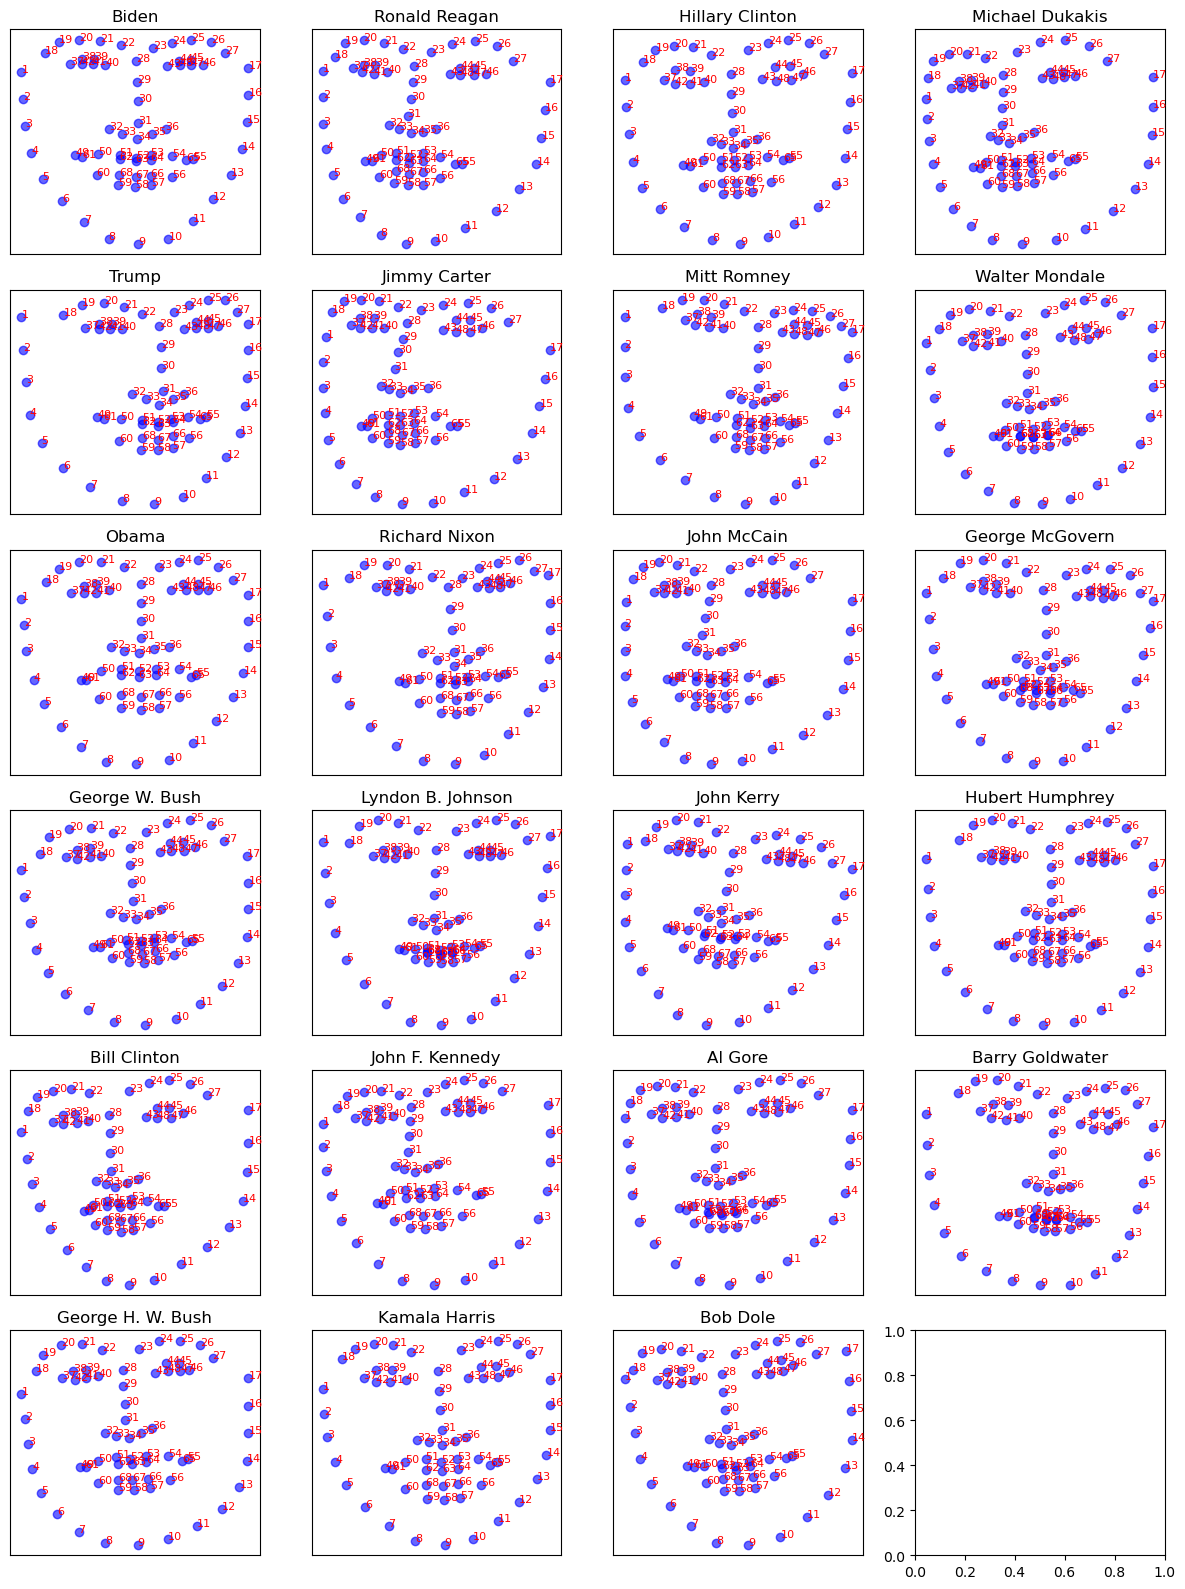

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `land_X` is already defined as a NumPy array and `df` is a DataFrame created from it
# Create a list to store distances for each president
distances = []

# List of president names based on DataFrame columns
presidents = [col.split('_')[1] for col in df.columns if col.startswith('X')]

# Loop through each president
for i, president in enumerate(presidents):
    # Extract coordinates for point 1 (index 0) and point 17 (index 16)
    x1, y1 = df.loc[8, f'X_{president}'], df.loc[8, f'Y_{president}']
    x17, y17 = df.loc[22, f'X_{president}'], df.loc[22, f'Y_{president}']

    # Calculate Euclidean distance
    distance = np.sqrt((x17 - x1) ** 2 + (y17 - y1) ** 2)
    distances.append(distance)

# Add distances to a DataFrame for tracking
df_distances = pd.DataFrame({'President': presidents, 'Face Length': distances})

# Plot the original coordinates on subplots
fig, ax = plt.subplots(6, 4, figsize=(12, 16))  # Adjust grid size for subplots
b, p = 0, 0  # Column and president index

while b < 4:
    k = 0
    while k < 6:
        if p >= len(presidents):  # Stop if all presidents are plotted
            break

        # Extract original coordinates for the current president
        x_coords = df[f'X_{presidents[p]}']
        y_coords = df[f'Y_{presidents[p]}']

        # Scatter plot on the current subplot
        ax[k, b].scatter(y_coords, x_coords, color='blue', alpha=0.6)

        # Add labels for landmarks
        for i, (x, y) in enumerate(zip(x_coords, y_coords)):
            ax[k, b].text(y, x, str(i + 1), fontsize=8, color='red')

        # Customize the subplot
        ax[k, b].invert_yaxis()  # Invert y-axis for image-like coordinates
        ax[k, b].set_title(presidents[p])  # Title with president's name
        ax[k, b].set_xticks([])  # Remove x-ticks
        ax[k, b].set_yticks([])  # Remove y-ticks

        k += 1  # Move to the next row
        p += 1  # Move to the next president
    b += 1  # Move to the next column

plt.tight_layout()  # Adjust layout
plt.show()

In [25]:
def distance_adder(point1,point2,df_m):
    
    distances = []

    # List of president names based on DataFrame columns
    presidents = [col.split('_')[1] for col in df.columns if col.startswith('X')]

    # Loop through each president
    for i, president in enumerate(presidents):
    
        x1, y1 = df.loc[point1-1, f'X_{president}'], df.loc[point1-1, f'Y_{president}']
        x, y = df.loc[point2-1, f'X_{president}'], df.loc[point2-1, f'Y_{president}']

        # Calculate Euclidean distance
        distance = np.sqrt((x - x1) ** 2 + (y - y1) ** 2)
        distances.append(distance)

    # Add distances to a DataFrame for tracking
    df_new = pd.DataFrame({f'Distance ({point1} to {point2})': distances})
    df_m = pd.concat([df_m, df_new], axis=1)

    return df_m

In [26]:
#df_distances = distance_adder(1,17,df_distances)
#df_distances = distance_adder(46,37,df_distances)

num_points = 68

# Loop through all combinations of points
for point1 in range(1, num_points + 1):
    for point2 in range(point1 , num_points + 1):  # Avoid redundant pairs
        if point1 != point2:
            df_distances = distance_adder(point1, point2, df_distances)

# Display the resulting DataFrame
print(df_distances)

# Optionally, save to CSV
df_distances.to_csv(r'.\\pairwise_distances.csv', index=False)

            President  Face Length  Distance (1 to 2)  Distance (1 to 3)  \
0               Biden   368.917335          52.086467         102.239914   
1               Trump   110.652610          19.026298          37.121422   
2               Obama    91.443972          12.041595          24.083189   
3      George W. Bush   150.003333          21.095023          41.436699   
4        Bill Clinton   150.000000          21.377558          40.792156   
5   George H. W. Bush   121.004132          15.132746          31.256999   
6       Ronald Reagan   123.911259          17.000000          34.000000   
7        Jimmy Carter   115.524889          15.132746          30.066593   
8       Richard Nixon   202.121251          34.234486          67.364679   
9   Lyndon B. Johnson   317.907219          50.159745         100.498756   
10    John F. Kennedy   302.165518          36.000000          73.109507   
11      Kamala Harris   264.682829          33.015148          65.192024   
12    Hillar

In [27]:
# Add the "Result" column
df_distances['Result'] = ['W']*11+['L']*12
# Move "Result" to the first column
result_column = df_distances.pop('Result')  # Remove the column
df_distances.insert(0, 'Result', result_column)  # Insert it at the first position

df_distances

,Result,President,Face Length,Distance (1 to 2),Distance (1 to 3),Distance (1 to 4),Distance (1 to 5),Distance (1 to 6),Distance (1 to 7),Distance (1 to 8),...,Distance (64 to 65),Distance (64 to 66),Distance (64 to 67),Distance (64 to 68),Distance (65 to 66),Distance (65 to 67),Distance (65 to 68),Distance (66 to 67),Distance (66 to 68),Distance (67 to 68)
0,W,Biden,368.917335,52.086467,102.239914,152.947703,204.377102,253.160028,301.400066,348.855271,...,62.000000,29.000000,40.459857,61.269895,68.447060,93.300589,120.074977,26.076810,55.036352,29.274562
1,W,Trump,110.652610,19.026298,37.121422,56.222771,72.993150,89.560036,105.309069,120.933866,...,16.124515,8.000000,13.453624,20.124612,18.867962,27.730849,35.735137,9.219544,18.027756,9.055385
2,W,Obama,91.443972,12.041595,24.083189,37.336309,48.836462,61.131007,72.111026,82.346828,...,14.035669,9.055385,11.661904,16.643317,15.264338,21.931712,29.120440,7.071068,15.000000,8.062258
3,W,George W. Bush,150.003333,21.095023,41.436699,62.801274,82.000000,100.578328,118.308918,134.238594,...,22.000000,7.071068,12.041595,19.697716,22.135944,31.320920,40.792156,9.219544,19.026298,10.049876
4,W,Bill Clinton,150.000000,21.377558,40.792156,59.439044,77.884530,96.798760,114.127122,130.176803,...,20.024984,12.041595,15.264338,20.808652,21.954498,30.463092,38.600518,9.055385,18.000000,9.055385
5,W,George H. W. Bush,121.004132,15.132746,31.256999,46.389654,61.983869,76.655072,90.824006,103.310212,...,20.024984,10.049876,13.601471,19.416488,21.954498,30.463092,37.947332,9.055385,17.029386,8.000000
6,W,Ronald Reagan,123.911259,17.000000,34.000000,50.039984,67.268120,82.873397,96.540147,110.367568,...,19.104973,7.000000,11.313708,17.088007,19.646883,27.658633,35.227830,8.062258,16.031220,8.246211
7,W,Jimmy Carter,115.524889,15.132746,30.066593,45.011110,61.008196,75.325958,88.645361,99.040396,...,21.095023,6.082763,9.899495,16.155494,20.396078,28.442925,36.221541,8.062258,16.000000,8.062258
8,W,Richard Nixon,202.121251,34.234486,67.364679,101.833197,132.574507,161.307160,189.081993,215.647861,...,30.413813,16.031220,23.853721,34.132096,35.805028,49.739320,63.324561,14.560220,30.066593,16.124515
9,W,Lyndon B. Johnson,317.907219,50.159745,100.498756,150.206524,195.532606,240.243626,283.240181,324.299245,...,36.674242,2.236068,18.681542,39.051248,36.138622,55.317267,75.538070,19.235384,40.000000,21.213203


In [28]:
array = [51.31-46.86,46.09-48.18,51.1-47.2,52.9-45.7,50.7-48.3,47.9-48.4,49.2-40.7,43-37.4,53.4-45.6,58.8-40.6,50.1-48,60.7-37.5,61-38.5,49.7-49.6]
a2 = [51.31-46.86,46.09-48.18,52.9-45.7,50.7-48.3,47.9-48.4,49.2-40.7,43-37.4,53.4-45.6,58.8-40.6,50.1-48,60.7-37.5,61-38.5,49.7-49.6]

In [29]:
import pandas as pd

# Load your DataFrame (assuming it is already loaded as df)
# Convert the "Result" column to numerical values: W -> 1, L -> 0
df_distances['Result_Numerical'] = df_distances['Result'].map({'W': 1, 'L': 0})

# Identify all the distance columns (assuming their names contain 'Distance')
distance_columns = [col for col in df_distances.columns if 'Distance' in col]

# Create a dictionary to store correlations
correlations = {}

# Calculate the correlation coefficient for each distance column
for column in distance_columns:
    correlation = df_distances['Result_Numerical'].corr(df_distances[column])
    correlations[column] = correlation

# Convert the dictionary to a DataFrame for better visualization
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Distance', 'Correlation'])

# Sort by the absolute value of the correlation
correlation_df['Abs_Correlation'] = correlation_df['Correlation'].abs()
correlation_df = correlation_df.sort_values(by='Abs_Correlation', ascending=False)

# Display the results
print(correlation_df)

# Optionally, save to CSV
correlation_df.to_csv(r'.\\correlation_results.csv', index=False)

                 Distance  Correlation  Abs_Correlation
1816  Distance (38 to 42)    -0.724888         0.724888
1844  Distance (39 to 41)    -0.710509         0.710509
2003  Distance (45 to 47)    -0.705038         0.705038
1981  Distance (44 to 48)    -0.703900         0.703900
1815  Distance (38 to 41)    -0.696600         0.696600
...                   ...          ...              ...
2170  Distance (53 to 66)    -0.387546         0.387546
2156  Distance (52 to 67)    -0.367674         0.367674
2262  Distance (62 to 68)    -0.235666         0.235666
2266  Distance (63 to 67)    -0.217988         0.217988
2269  Distance (64 to 66)    -0.200781         0.200781

[2278 rows x 3 columns]


In [30]:
# Sort by absolute correlation and take the top 15
top_30_correlations = correlation_df.sort_values(by='Abs_Correlation', ascending=False).head(30)

# Display the top 15 correlations
print(top_30_correlations)

                 Distance  Correlation  Abs_Correlation
1816  Distance (38 to 42)    -0.724888         0.724888
1844  Distance (39 to 41)    -0.710509         0.710509
2003  Distance (45 to 47)    -0.705038         0.705038
1981  Distance (44 to 48)    -0.703900         0.703900
1815  Distance (38 to 41)    -0.696600         0.696600
1843  Distance (39 to 40)    -0.694313         0.694313
2004  Distance (45 to 48)    -0.693645         0.693645
1980  Distance (44 to 47)    -0.693057         0.693057
2047  Distance (47 to 48)    -0.673888         0.673888
1845  Distance (39 to 42)    -0.667896         0.667896
1953  Distance (43 to 44)    -0.667339         0.667339
2168  Distance (53 to 64)    -0.663264         0.663264
1978  Distance (44 to 45)    -0.660083         0.660083
2152  Distance (52 to 63)    -0.659327         0.659327
1814  Distance (38 to 40)    -0.658897         0.658897
1954  Distance (43 to 45)    -0.655748         0.655748
1168  Distance (21 to 40)    -0.654563         0

In [31]:
from sklearn.neural_network import MLPClassifier, MLPRegressor

even = np.arange(0,23,2)
odd = np.arange(1,23,2)

X_train = df_distances.loc[odd, 'Distance (1 to 2)':'Distance (67 to 68)']
y_train = df_distances.loc[odd,'Result_Numerical']

X_test = df_distances.loc[even, 'Distance (1 to 2)':'Distance (67 to 68)']
y_test = df_distances.loc[even,'Result_Numerical']

cl = MLPClassifier(random_state=50, max_iter=10000).fit(X_train, y_train)

print(cl.predict(X_test))
print('\n',y_test.T)
cl.score(X_test, y_test)

[1 0 1 1 0 1 0 1 1 1 0 0]

 0     1
2     1
4     1
6     1
8     1
10    1
12    0
14    0
16    0
18    0
20    0
22    0
Name: Result_Numerical, dtype: int64


0.5833333333333334

In [32]:
import os
import dlib
import cv2
import numpy as np

# Path to the images folder
images_folder = r".\\Primary Losers"

# Initialize Dlib's face detector
detector = dlib.get_frontal_face_detector()

# Initialize Dlib's shape predictor with the 68 landmarks model
shape_predictor_path = r'.\\shape_predictor_68_face_landmarks.dat'
predictor = dlib.shape_predictor(shape_predictor_path)

# Create an empty list to store the landmarks
landmarks_list = []

# Loop through all the images in the "images" folder
for filename in os.listdir(images_folder):
    image_path = os.path.join(images_folder, filename)

    # Read the image
    image = cv2.imread(image_path)
    
    if image is None:
        print("The following image cannot be processed: ", image_path)
        continue  # Skip if the image cannot be read

    # Detect faces in the image
    faces = detector(image, 1)
    
    if len(faces) > 0:
        print("A face was found on the following image: ", image_path)
        # Assuming only one face per image, take the first detected face
        face = faces[0]

        # Predict the 68 landmarks for the face
        shape = predictor(image, face)

        # Extract the coordinates of the landmarks
        landmarks = np.array([[shape.part(i).x, shape.part(i).y] for i in range(68)])

        # Flatten the array and append to the landmarks list
        landmarks_list.append(landmarks.flatten())
        
        '''   
        # Draw the landmarks on the image
        for point in range(68):
            x, y = shape.part(point).x, shape.part(point).y
            cv2.circle(image, (x, y), 2, (0, 255, 0), -1)  # Draw a small green circle
        
        #Display the image with landmarks
        cv2.imshow('Facial Landmarks', image)
        cv2.waitKey(0)  # Press any key to close the window 
        cv2.destroyAllWindows()
        '''
        

    else: 
        print("A face was not found on the following image: ", image_path)


# Convert the landmarks list to a numpy array
Primary_Losers = np.array(landmarks_list)

# Print the shape of the resulting matrix
print(f"P-Losers shape: {Primary_Losers.shape}")

output_folder = r'.\\President Face Coordinates'  # Change to your desired directory
os.makedirs(output_folder, exist_ok=True)  # Create the folder if it doesn't exist
output_path = os.path.join(output_folder, 'prim_losers.npy')
np.save(output_path, Primary_Losers)

Primary_list = [
    "Wesley Clark",
    "Rick Santorum",
    "Bernie Sanders",
    "Bill Bradley",
    "Elizabeth Warren",
    "Gary Hart",
    "Jeb Bush",
    "Jesse Jackson",
    "Newt Gingrich",
    "Pete Buttigieg",
    "Scoop Jackson",
    "John Edwards",
    "Ron Paul",
    "Andrew Yang",
    "Dick Gephardt",
    "George Wallace",
    "John Kasich",
    "Marco Rubio",
    "Mike Bloomberg",
    "Nikki Haley",
    "Ted Cruz",
    "Ted Kennedy",
    "Tulsi Gabbard"
]


import numpy as np
import pandas as pd

# Assuming `land_X` is your NumPy array with landmarks
# Create an empty DataFrame to hold the results
df_primary = pd.DataFrame()
p=0

# Loop through each president (row in land_X)
for i, landmarks in enumerate(land_X):

    # Separate X (odd indices) and Y (even indices)
    x_coords = landmarks[odd_indx]
    y_coords = landmarks[even_indx]

    # Create a DataFrame for this president
    p_df = pd.DataFrame({
        'X_' + Primary_list[i]: x_coords,
        'Y_' + Primary_list[i]: y_coords
    })

    # Append to the main DataFrame
    df_primary = pd.concat([df_primary, p_df], axis=1)

    p+=1

# Display the resulting DataFrame
print(df_primary)

# Optionally, save the DataFrame to a CSV file
df.to_csv(r'.\\landmarks_primary_losers.csv', index=False)



A face was found on the following image:  .\\Primary Losers\180px-General_Wesley_Clark_official_photograph_(cropped).jpg
A face was found on the following image:  .\\Primary Losers\180px-John_Edwards,_official_Senate_photo_portrait_(cropped_3x4).jpg
A face was found on the following image:  .\\Primary Losers\190422170301-01-andrew-yang.jpg
A face was found on the following image:  .\\Primary Losers\330px-Rick_Santorum_by_Gage_Skidmore_12.jpg
A face was found on the following image:  .\\Primary Losers\800px-Ron_paul.jpg
A face was found on the following image:  .\\Primary Losers\Bernie_Sanders_2023.jpg
A face was found on the following image:  .\\Primary Losers\BillBradley_(cropped).jpg
A face was found on the following image:  .\\Primary Losers\Dick_Gephardt_portrait_(cropped).jpg
A face was found on the following image:  .\\Primary Losers\Elizabeth_Warren_Loser.jpg
A face was found on the following image:  .\\Primary Losers\Gary_Hart_1984_(cropped).jpg
A face was found on the followin

In [33]:
df_primary

,X_Wesley Clark,Y_Wesley Clark,X_Rick Santorum,Y_Rick Santorum,X_Bernie Sanders,Y_Bernie Sanders,X_Bill Bradley,Y_Bill Bradley,X_Elizabeth Warren,Y_Elizabeth Warren,...,X_Mike Bloomberg,Y_Mike Bloomberg,X_Nikki Haley,Y_Nikki Haley,X_Ted Cruz,Y_Ted Cruz,X_Ted Kennedy,Y_Ted Kennedy,X_Tulsi Gabbard,Y_Tulsi Gabbard
0,411,304,166,113,87,142,173,118,205,100,...,496,259,441,334,97,145,416,201,420,140
1,463,307,185,114,99,143,194,120,226,104,...,543,260,482,339,106,146,479,205,472,141
2,513,311,203,116,111,144,214,124,245,108,...,592,266,523,346,116,147,539,209,523,145
3,563,321,222,118,124,147,235,128,263,113,...,644,274,564,353,125,148,600,218,574,153
4,612,341,238,125,135,151,253,136,280,121,...,697,288,602,366,133,151,654,243,620,171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,577,529,226,203,122,196,229,209,261,179,...,644,483,577,511,130,182,588,487,599,361
64,577,591,224,219,123,210,229,231,262,199,...,637,561,571,552,130,189,600,545,603,400
65,606,529,234,203,131,197,236,210,273,180,...,665,484,577,512,131,182,616,487,597,360
66,608,503,236,194,132,190,238,201,274,171,...,671,449,580,491,131,178,618,456,597,343


In [ ]:
"""num_points = 68

# Loop through all combinations of points
for point1 in range(1, num_points + 1):
    for point2 in range(point1 , num_points + 1):  # Avoid redundant pairs
        if point1 != point2:
            df_primary = distance_adder(point1, point2, df_primary)

# Display the resulting DataFrame
print(df_primary_distances)

# Optionally, save to CSV
df_primary_distances.to_csv(r'C:\Users\Jason\Desktop\pairwise_distances_primaryfolks.csv', index=False)

df_primary_distances

"""

NameError: name 'df_primary_distances' is not defined